In [ ]:
!git clone https://github.com/antoinexp/SemesterProject.git

fatal: destination path 'SemesterProject' already exists and is not an empty directory.


In [ ]:
%cd "./SemesterProject/PROJECT"

/content/SemesterProject/PROJECT


In [ ]:
import torch
import numpy as np
import util as f
import gradient_descent as gd
import matplotlib.pyplot as plt

In [ ]:
#Size of the matrix Y
N = 100
M = N

#
lambda_ = 20.

#temperatures
beta_u = float("inf")
beta_v = beta_u

#learning rates
lambda_1 = 1
lambda_2 = lambda_1

# Pas de temps
dt = 1/100

In [ ]:
u_ = f.generate_vector(N)
v_ = f.generate_vector(M)

Y = f.generate_Y(u_,v_, lambda_)

# Conditions initiales

u_p = f.generate_vector(N)
v_p = f.generate_vector(M)


In [ ]:
(f.overlap(u_,u_p,N), f.overlap(v_,v_p,M) )

(tensor([[-0.0136]]), tensor([[0.0587]]))

In [ ]:
def main_gradient_2_sans_proj_normalisation(u_p, v_p, Y, u_, v_, N, M, lambda_, beta_u, beta_v, lambda_1, lambda_2, dt):
    res = []

    iteration = 100
    for i in range(iteration):
      if i%10==0:
        print(f"progress {100*i/iteration:.2f}%")
      sqrt_dt = torch.tensor(np.sqrt(dt))

      u_1 = (1/lambda_1) * f.gradient_u_2(u_p,v_p,Y,lambda_) * dt
      u_2 = torch.sqrt(torch.tensor(2/(lambda_1*beta_u))) * torch.normal(0, sqrt_dt, size=(1, N))
      u_3 = ((N-1)/(N*lambda_1*beta_u))*u_p*dt


      u_n = u_p - u_1 + u_2 - u_3

      v_1 = 1/lambda_2 * f.gradient_v_2(u_p,v_p,Y,lambda_) * dt
      v_2 = torch.sqrt(torch.tensor(2/(lambda_2*beta_v))) * torch.normal(0, sqrt_dt, size=(1, M))
      v_3 = ((M-1)/(M*lambda_2*beta_v))*v_p*dt
      v_n = v_p - v_1 + v_2 - v_3

      u_n = u_n / torch.linalg.norm(u_n)
      v_n = v_n / torch.linalg.norm(v_n)
      u_n = u_n * torch.sqrt(torch.tensor(N))
      v_n = v_n * torch.sqrt(torch.tensor(N))

      res.append( (f.overlap(u_,u_n,N), f.overlap(v_,v_n,M)) )

      u_p = u_n
      v_p = v_n
    
    res_u = f.overlap(u_,u_n,N)
    res_v = f.overlap(v_,v_n,M)
    print("g2_u_norm: ", res_u, "g2_v_norm: ", res_v)

    return np.array(res)

In [ ]:
res = main_gradient_2_sans_proj_normalisation(u_p, v_p, Y, u_, v_, N, M, lambda_, beta_u, beta_v, lambda_1, lambda_2, dt)

progress 0.00%
progress 10.00%
progress 20.00%
progress 30.00%
progress 40.00%
progress 50.00%
progress 60.00%
progress 70.00%
progress 80.00%
progress 90.00%
g2_u_norm:  tensor([[0.9791]]) g2_v_norm:  tensor([[0.9786]])


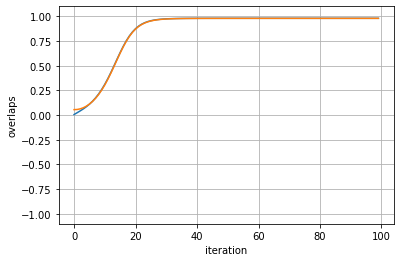

In [ ]:
plt.plot(res)
plt.grid()
plt.xlabel("iteration")
plt.ylabel("overlaps")
plt.ylim(-1.1,1.1)
plt.show()